<a href="https://colab.research.google.com/github/DanielDekhtyar/AI-Accelerator/blob/main/Module%207%20-%20Machine%20Learning/moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

יבאו את הספריות

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

הריצו את הקוד ליצירת נתוני ירח

In [2]:
# Generate Moon Dataset
samples = 1000
X, y = make_moons(samples, noise=0.1, random_state=42)

# Create pandas DF
df = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])
df['Target'] = y

הציגו את הנתונים השונים בעזרת  Scatter plot

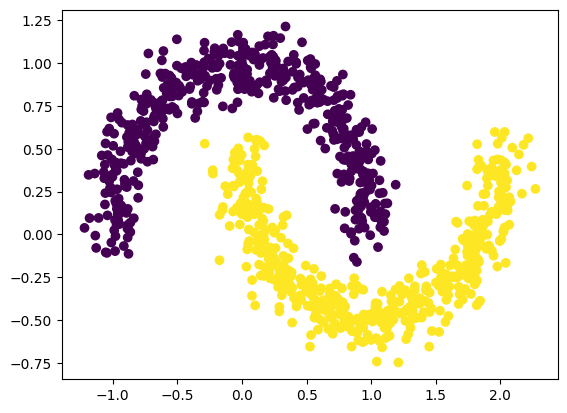

In [3]:
plt.scatter(df['Feature_1'], df['Feature_2'], c = df['Target'])
plt.show()

בניית המודל

In [4]:
# Make Test/Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert Dataset to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [5]:
# Define Neural Network Architecture
class MyNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 32)
        self.ReLU1 = nn.ReLU()
        self.fc2 = nn.Linear(32, 64)
        self.ReLU2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 8)
        self.ReLU3 = nn.ReLU()
        self.fc4 = nn.Linear(8, 1)

    # Define the forward method
    def forward(self, x):
        x = self.fc1(x)
        x = self.ReLU1(x)
        x = self.fc2(x)
        x = self.ReLU2(x)
        x = self.fc3(x)
        x = self.ReLU3(x)
        x = self.fc4(x)
        x = torch.sigmoid(x)
        return x



In [6]:
# Instantiate Model and Select Loss Function/Optimizer
model = MyNN()

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [7]:
# Training Loop
epochs = 10000
model.train()

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# print the loss every 100 epochs
    if epoch%100 == 0:
        print(f"epoch :{epoch} Loss: {loss.item()}")

epoch :0 Loss: 0.705109179019928
epoch :100 Loss: 0.2907928228378296
epoch :200 Loss: 0.18909181654453278
epoch :300 Loss: 0.09335613995790482
epoch :400 Loss: 0.036665547639131546
epoch :500 Loss: 0.019602833315730095
epoch :600 Loss: 0.013043126091361046
epoch :700 Loss: 0.009756102226674557
epoch :800 Loss: 0.007775476202368736
epoch :900 Loss: 0.006452524568885565
epoch :1000 Loss: 0.0054988497868180275
epoch :1100 Loss: 0.004767246078699827
epoch :1200 Loss: 0.004192940425127745
epoch :1300 Loss: 0.003732411190867424
epoch :1400 Loss: 0.00335696036927402
epoch :1500 Loss: 0.0030453442595899105
epoch :1600 Loss: 0.002775525441393256
epoch :1700 Loss: 0.0025481872726231813
epoch :1800 Loss: 0.002358857775107026
epoch :1900 Loss: 0.0022019357420504093
epoch :2000 Loss: 0.002065293723717332
epoch :2100 Loss: 0.0019435876747593284
epoch :2200 Loss: 0.0018351791659370065
epoch :2300 Loss: 0.0017379112541675568
epoch :2400 Loss: 0.0016500384081155062
epoch :2500 Loss: 0.00157049123663455

You can  download `PlotBoudary.ipynb` and use
```python
%run /content/PlotBoudary.ipynb
```
to create Plot the funtion `plot_boundary` expects X,y and the model name

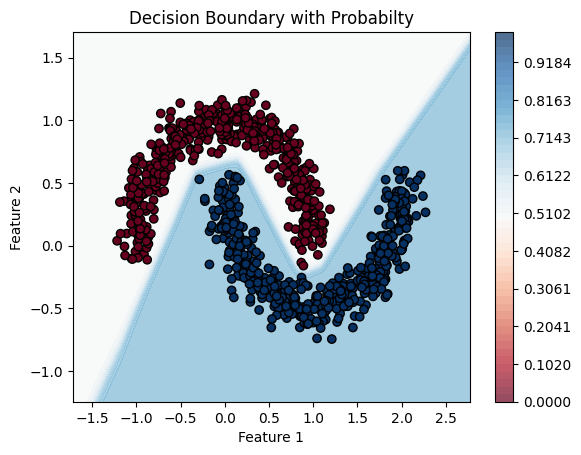

In [9]:
%run /content/PlotBoudary.ipynb
plot_boundary(X, y, model)
plt.show()